# Census County Business Patterns (CBP) - Quick Start Guide

© 2025 KR-Labs. All rights reserved.  
**Part of the KR-Labs Analytics Suite**

---

## Overview

This notebook demonstrates the **County Business Patterns (CBP) Connector** for accessing U.S. Census Bureau business statistics data.

**What is CBP?**
- Business establishment counts by industry (NAICS codes)
- Employment levels and annual payroll
- County, state, and metropolitan area data
- Historical data back to 1986

**Use Cases:**
- 📊 Industry composition analysis
- 👥 Employment by sector
- 💰 Payroll and wage analysis
- 🏢 Business establishment trends
- 📍 Geographic economic patterns

**API Information:**
- Source: U.S. Census Bureau
- API Key: Required (free at https://api.census.gov/data/key_signup.html)
- Rate Limit: Generous (no documented limit)
- Data Format: JSON → pandas DataFrame

## 1. Setup and Installation

In [1]:
# Install krl-data-connectors (if not already installed)
# !pip install krl-data-connectors

# Import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from krl_data_connectors import CountyBusinessPatternsConnector

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

print("✅ Setup complete!")

✅ Setup complete!


## 2. API Key Configuration

The CBP connector requires a Census Bureau API key. Get yours at: https://api.census.gov/data/key_signup.html

**Option 1: Environment Variable (Recommended)**
```bash
export CENSUS_API_KEY="your_key_here"
```

**Option 2: Pass directly to connector**
```python
cbp = CountyBusinessPatternsConnector(api_key="your_key_here")
```

In [2]:
# Initialize connector (will automatically detect CENSUS_API_KEY from environment)
cbp = CountyBusinessPatternsConnector()

# Verify API key is loaded
if cbp.api_key:
    print(f"✅ API key loaded: {cbp.api_key[:10]}...")
else:
    print("⚠️  No API key found. Please set CENSUS_API_KEY environment variable.")
    print("   Get your key at: https://api.census.gov/data/key_signup.html")

{"timestamp": "2025-10-19T20:33:17.280285Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 82, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19", "connector": "CountyBusinessPatternsConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 3600, "has_api_key": true}
{"timestamp": "2025-10-19T20:33:17.280691Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Initialized County Business Patterns connector", "source": {"file": "cbp_connector.py", "line": 81, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19"}
✅ API key loaded: 199343249e...
{"timestamp": "2025-10-19T20:33:17.280691Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Initialized County Business Patterns connector", "source": {"file": "cbp_connector.py", "line": 81, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-19"}
✅ API key loaded:

## 3. Basic Usage: State-Level Data

Let's start by fetching business data for a single state.

In [3]:
# Get retail trade data for Rhode Island (FIPS code: 44)
retail_ri = cbp.get_state_data(
    year=2021,
    state='44',  # Rhode Island
    naics='44'   # Retail trade sector
)

print(f"📊 Retrieved {len(retail_ri)} records for Rhode Island retail trade")
print("\n" + "="*80)
print("Sample Data:")
print("="*80)
print(retail_ri[['NAICS2017', 'NAME', 'ESTAB', 'EMP', 'PAYANN']].head(10))

{"timestamp": "2025-10-19T20:33:17.291246Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Fetching CBP state data: year=2021, state=44, naics=44", "source": {"file": "cbp_connector.py", "line": 266, "function": "get_state_data"}, "levelname": "INFO", "taskName": "Task-21"}
{"timestamp": "2025-10-19T20:33:17.294159Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Cache hit", "source": {"file": "base_connector.py", "line": 178, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-21", "url": "https://api.census.gov/data/2021/cbp", "cache_key": "1bf34f24d8608554"}
{"timestamp": "2025-10-19T20:33:17.294159Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Cache hit", "source": {"file": "base_connector.py", "line": 178, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-21", "url": "https://api.census.gov/data/2021/cbp", "cache_key": "1bf34f24d8608554"}
{"timestamp": "2025-10-19T2

## 4. NAICS Industry Codes

CBP data is organized by NAICS (North American Industry Classification System) codes.

**Common NAICS Sectors:**
- `11` - Agriculture, Forestry, Fishing
- `21` - Mining, Quarrying, Oil & Gas
- `22` - Utilities
- `23` - Construction
- `31-33` - Manufacturing
- `42` - Wholesale Trade
- `44-45` - Retail Trade
- `48-49` - Transportation & Warehousing
- `51` - Information
- `52` - Finance & Insurance
- `53` - Real Estate & Rental
- `54` - Professional & Technical Services
- `55` - Management of Companies
- `56` - Administrative Support
- `61` - Educational Services
- `62` - Health Care & Social Assistance
- `71` - Arts, Entertainment, Recreation
- `72` - Accommodation & Food Services
- `81` - Other Services

In [4]:
# Compare multiple industries for California
industries = {
    '31': 'Manufacturing',
    '44': 'Retail Trade',
    '54': 'Professional Services',
    '62': 'Healthcare'
}

ca_industry_data = []

for naics, name in industries.items():
    data = cbp.get_state_data(year=2021, state='06', naics=naics)
    if not data.empty:
        total_est = data['ESTAB'].sum()
        total_emp = data['EMP'].sum()
        total_pay = data['PAYANN'].sum()
        ca_industry_data.append({
            'Industry': name,
            'NAICS': naics,
            'Establishments': total_est,
            'Employment': total_emp,
            'Annual Payroll ($M)': total_pay / 1_000_000
        })

ca_summary = pd.DataFrame(ca_industry_data)
print("📊 California Industry Summary (2021)")
print("="*80)
print(ca_summary.to_string(index=False))

{"timestamp": "2025-10-19T20:33:17.320823Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Fetching CBP state data: year=2021, state=06, naics=31", "source": {"file": "cbp_connector.py", "line": 266, "function": "get_state_data"}, "levelname": "INFO", "taskName": "Task-23"}
{"timestamp": "2025-10-19T20:33:17.327757Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Cache hit", "source": {"file": "base_connector.py", "line": 178, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-23", "url": "https://api.census.gov/data/2021/cbp", "cache_key": "e62259418d5d3cee"}
{"timestamp": "2025-10-19T20:33:17.331289Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Retrieved 147 CBP state records", "source": {"file": "cbp_connector.py", "line": 284, "function": "get_state_data"}, "levelname": "INFO", "taskName": "Task-23"}
{"timestamp": "2025-10-19T20:33:17.327757Z", "level": "INFO", "name": "CountyBusiness

## 5. Visualization: Top Industries by Employment

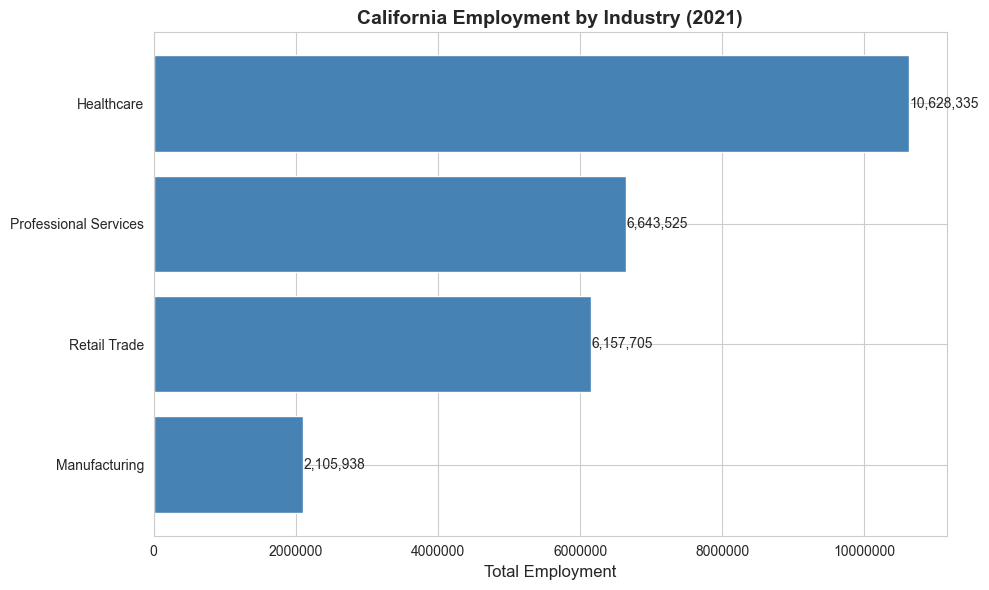

💡 Insight: Healthcare has the most employment in California


In [5]:
# Create bar chart of industry employment
fig, ax = plt.subplots(figsize=(10, 6))
ca_summary_sorted = ca_summary.sort_values('Employment', ascending=True)
ax.barh(ca_summary_sorted['Industry'], ca_summary_sorted['Employment'], color='steelblue')
ax.set_xlabel('Total Employment', fontsize=12)
ax.set_title('California Employment by Industry (2021)', fontsize=14, fontweight='bold')
ax.ticklabel_format(style='plain', axis='x')
for i, v in enumerate(ca_summary_sorted['Employment']):
    ax.text(v + 10000, i, f'{int(v):,}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

print(f"💡 Insight: {ca_summary_sorted.iloc[-1]['Industry']} has the most employment in California")

## 6. County-Level Analysis

Get detailed data for counties within a state.

In [6]:
# Get technology sector data for all California counties
tech_counties = cbp.get_county_data(
    year=2021,
    state='06',  # California
    naics='54'   # Professional & Technical Services
)

print(f"📊 Retrieved data for {len(tech_counties)} records across California counties")
print("\nTop 10 Counties by Tech Employment:")
print("="*80)

# Aggregate by county and get top 10
county_totals = tech_counties.groupby('NAME').agg({
    'ESTAB': 'sum',
    'EMP': 'sum',
    'PAYANN': 'sum'
}).reset_index()

county_totals = county_totals.sort_values('EMP', ascending=False).head(10)
county_totals['Avg Salary ($)'] = (county_totals['PAYANN'] / county_totals['EMP']).round(0)

print(county_totals[['NAME', 'ESTAB', 'EMP', 'Avg Salary ($)']].to_string(index=False))

{"timestamp": "2025-10-19T20:33:17.424064Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Fetching CBP county data: year=2021, state=06, county=None, naics=54", "source": {"file": "cbp_connector.py", "line": 192, "function": "get_county_data"}, "levelname": "INFO", "taskName": "Task-27"}
{"timestamp": "2025-10-19T20:33:17.480815Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Cache hit", "source": {"file": "base_connector.py", "line": 178, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-27", "url": "https://api.census.gov/data/2021/cbp", "cache_key": "aebcd782e77ca49d"}
{"timestamp": "2025-10-19T20:33:17.480815Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Cache hit", "source": {"file": "base_connector.py", "line": 178, "function": "_make_request"}, "levelname": "INFO", "taskName": "Task-27", "url": "https://api.census.gov/data/2021/cbp", "cache_key": "aebcd782e77ca49d"}
{"timestamp"

## 7. Caching and Performance

The CBP connector includes built-in caching to reduce API calls and improve performance.

In [7]:
import time

# Configure connector with custom cache settings
cbp_cached = CountyBusinessPatternsConnector(
    cache_dir="~/.krl_cache/cbp"
)

# First request - will hit the API
start = time.time()
data1 = cbp_cached.get_state_data(year=2021, state='06', naics='62')
time1 = time.time() - start

# Second request - will use cache
start = time.time()
data2 = cbp_cached.get_state_data(year=2021, state='06', naics='62')
time2 = time.time() - start

print(f"⏱️  First request (API call): {time1:.3f}s")
print(f"⏱️  Second request (cached):  {time2:.3f}s")
if time2 > 0:
    print(f"🚀 Cache speedup: {time1/time2:.1f}x faster")
else:
    print(f"🚀 Cache speedup: Instant (cached)")
print(f"\n✅ Both requests returned identical data: {data1.equals(data2)}")

{"timestamp": "2025-10-19T20:33:17.643310Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 82, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-29", "connector": "CountyBusinessPatternsConnector", "cache_dir": "~/.krl_cache/cbp", "cache_ttl": 3600, "has_api_key": true}
{"timestamp": "2025-10-19T20:33:17.643617Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Initialized County Business Patterns connector", "source": {"file": "cbp_connector.py", "line": 81, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-29"}
{"timestamp": "2025-10-19T20:33:17.643945Z", "level": "INFO", "name": "CountyBusinessPatternsConnector", "message": "Fetching CBP state data: year=2021, state=06, naics=62", "source": {"file": "cbp_connector.py", "line": 266, "function": "get_state_data"}, "levelname": "INFO", "taskName": "Task-29"}
{"timestamp": "2025-10-19T20:3

## 8. Next Steps & Resources

**Learn More:**
- 📚 [CBP API Documentation](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/cbp-api.html)
- 🔢 [NAICS Code Reference](https://www.census.gov/naics/)
- 📊 [Full krl-data-connectors Documentation](https://docs.krlabs.dev/data-connectors)

**Try These Examples:**
- Compare employment trends across multiple years
- Analyze payroll data to calculate average wages
- Create geographic visualizations with county data
- Combine with other connectors (LEHD, BLS) for comprehensive analysis

**Need Help?**
- GitHub Issues: https://github.com/KR-Labs/krl-data-connectors/issues
- Documentation: https://docs.krlabs.dev
- Email: support@krlabs.dev